In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import Libraries

In [2]:
import pandas as pd
import datetime
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import statsmodels
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import plotly.express as px
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import warnings
warnings.filterwarnings("ignore")

In [3]:
import datetime as dt
import yfinance as yf
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2023, 8, 10)
symbol = "MSFT"

In [4]:
stock_data = yf.download(symbol, start=start, end=end)
print(stock_data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-03   58.687500   59.312500   56.000000   58.281250   36.205593   
2000-01-04   56.781250   58.562500   56.125000   56.312500   34.982567   
2000-01-05   55.562500   58.187500   54.687500   56.906250   35.351421   
2000-01-06   56.093750   56.937500   54.187500   55.000000   34.167225   
2000-01-07   54.312500   56.125000   53.656250   55.718750   34.613716   
...                ...         ...         ...         ...         ...   
2023-08-03  326.000000  329.880005  325.950012  326.660004  325.969849   
2023-08-04  331.880005  335.140015  327.239990  327.779999  327.087494   
2023-08-07  328.369995  331.109985  327.519989  330.109985  329.412537   
2023-08-08  326.959991  328.750000  323.000000  326.049988  325.361115   
2023-08-09  326.470001  327.109985  321.049

In [5]:
data = pd.DataFrame(stock_data)
data.head()

Open     High       Low     Close  Adj Close    Volume
Date                                                                  
2000-01-03  58.68750  59.3125  56.00000  58.28125  36.205593  53228400
2000-01-04  56.78125  58.5625  56.12500  56.31250  34.982567  54119000
2000-01-05  55.56250  58.1875  54.68750  56.90625  35.351421  64059600
2000-01-06  56.09375  56.9375  54.18750  55.00000  34.167225  54976600
2000-01-07  54.31250  56.1250  53.65625  55.71875  34.613716  62013600

In [6]:
data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-07-27', '2023-07-28', '2023-07-31', '2023-08-01',
               '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-07',
               '2023-08-08', '2023-08-09'],
              dtype='datetime64[ns]', name='Date', length=5938, freq=None)

In [7]:
data['Date'] = data.index

data.head()

Open     High       Low     Close  Adj Close    Volume  \
Date                                                                     
2000-01-03  58.68750  59.3125  56.00000  58.28125  36.205593  53228400   
2000-01-04  56.78125  58.5625  56.12500  56.31250  34.982567  54119000   
2000-01-05  55.56250  58.1875  54.68750  56.90625  35.351421  64059600   
2000-01-06  56.09375  56.9375  54.18750  55.00000  34.167225  54976600   
2000-01-07  54.31250  56.1250  53.65625  55.71875  34.613716  62013600   

                 Date  
Date                   
2000-01-03 2000-01-03  
2000-01-04 2000-01-04  
2000-01-05 2000-01-05  
2000-01-06 2000-01-06  
2000-01-07 2000-01-07

In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
data = data[["Date","Open","High","Low","Close","Volume"]]
data.head()

Date      Open     High       Low     Close    Volume
0 2000-01-03  58.68750  59.3125  56.00000  58.28125  53228400
1 2000-01-04  56.78125  58.5625  56.12500  56.31250  54119000
2 2000-01-05  55.56250  58.1875  54.68750  56.90625  64059600
3 2000-01-06  56.09375  56.9375  54.18750  55.00000  54976600
4 2000-01-07  54.31250  56.1250  53.65625  55.71875  62013600

In [10]:
data = pd.DataFrame(data)

In [11]:
data

Date        Open        High         Low       Close    Volume
0    2000-01-03   58.687500   59.312500   56.000000   58.281250  53228400
1    2000-01-04   56.781250   58.562500   56.125000   56.312500  54119000
2    2000-01-05   55.562500   58.187500   54.687500   56.906250  64059600
3    2000-01-06   56.093750   56.937500   54.187500   55.000000  54976600
4    2000-01-07   54.312500   56.125000   53.656250   55.718750  62013600
...         ...         ...         ...         ...         ...       ...
5933 2023-08-03  326.000000  329.880005  325.950012  326.660004  18253700
5934 2023-08-04  331.880005  335.140015  327.239990  327.779999  23727700
5935 2023-08-07  328.369995  331.109985  327.519989  330.109985  17741500
5936 2023-08-08  326.959991  328.750000  323.000000  326.049988  22327600
5937 2023-08-09  326.470001  327.109985  321.049988  322.230011  22373300

[5938 rows x 6 columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5938 non-null   datetime64[ns]
 1   Open    5938 non-null   float64       
 2   High    5938 non-null   float64       
 3   Low     5938 non-null   float64       
 4   Close   5938 non-null   float64       
 5   Volume  5938 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 278.5 KB


In [13]:
data["Date"] = pd.to_datetime(data["Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5938 non-null   datetime64[ns]
 1   Open    5938 non-null   float64       
 2   High    5938 non-null   float64       
 3   Low     5938 non-null   float64       
 4   Close   5938 non-null   float64       
 5   Volume  5938 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 278.5 KB


In [14]:
for i in range(len(data["Date"])):
      data["Date"][i]= data["Date"][i].strftime('%Y-%m-%d')
data

Date        Open        High         Low       Close    Volume
0    2000-01-03   58.687500   59.312500   56.000000   58.281250  53228400
1    2000-01-04   56.781250   58.562500   56.125000   56.312500  54119000
2    2000-01-05   55.562500   58.187500   54.687500   56.906250  64059600
3    2000-01-06   56.093750   56.937500   54.187500   55.000000  54976600
4    2000-01-07   54.312500   56.125000   53.656250   55.718750  62013600
...         ...         ...         ...         ...         ...       ...
5933 2023-08-03  326.000000  329.880005  325.950012  326.660004  18253700
5934 2023-08-04  331.880005  335.140015  327.239990  327.779999  23727700
5935 2023-08-07  328.369995  331.109985  327.519989  330.109985  17741500
5936 2023-08-08  326.959991  328.750000  323.000000  326.049988  22327600
5937 2023-08-09  326.470001  327.109985  321.049988  322.230011  22373300

[5938 rows x 6 columns]

In [15]:
data.describe().T

count          mean           std         min          25%  \
Open    5938.0  7.456715e+01  8.263612e+01       15.20        27.01   
High    5938.0  7.535490e+01  8.349929e+01       15.62        27.27   
Low     5938.0  7.376823e+01  8.174000e+01       14.87        26.77   
Close   5938.0  7.458604e+01  8.266414e+01       15.15        27.02   
Volume  5938.0  5.167646e+07  3.077031e+07  7425600.00  29078400.00   

                 50%           75%           max  
Open    3.215500e+01  7.415750e+01  3.617500e+02  
High    3.255625e+01  7.458500e+01  3.667800e+02  
Low     3.182250e+01  7.380750e+01  3.524400e+02  
Close   3.221437e+01  7.425000e+01  3.594900e+02  
Volume  4.645325e+07  6.532975e+07  5.910522e+08

# Data Analysis

In [16]:
liste=[]
for i in range(len(data["Date"])):
    if data["Date"][i].year in liste:
          pass
    else:
          liste.append(data["Date"][i].year)
liste

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.Date, y = data.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.Date, y = data.Low,
                    mode='lines',
                    name='Low',
                    marker_color = '#D62728',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.Date, y = data.Open,
                    mode='lines',
                    name='Open',
                    marker_color = '#FF7F0E',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.Date, y = data.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))

fig.update_layout(
    title='Reliance history',
    titlefont_size = 28,

    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,2023],
        titlefont_size=16,
        tickfont_size=14),

    height = 800,

    yaxis=dict(
        title='Stock',
        titlefont_size=16,
        tickfont_size=14),

    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

In [18]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(
    title='Reliance History',
    titlefont_size = 28
)


fig.show()

In [19]:
fig = go.Figure()
for col in data.iloc[:,1:5].columns:
      fig.add_trace(go.Violin(y=data[col],
                              box_visible=True,
                              name=col,
                              meanline_visible=True,
                              x0=col))
fig.show()

In [20]:
df = data.copy()
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month_year'] = df['Date'].dt.to_period('M')
df.head()

Date      Open     High       Low     Close    Volume  year  month  \
0 2000-01-03  58.68750  59.3125  56.00000  58.28125  53228400  2000      1   
1 2000-01-04  56.78125  58.5625  56.12500  56.31250  54119000  2000      1   
2 2000-01-05  55.56250  58.1875  54.68750  56.90625  64059600  2000      1   
3 2000-01-06  56.09375  56.9375  54.18750  55.00000  54976600  2000      1   
4 2000-01-07  54.31250  56.1250  53.65625  55.71875  62013600  2000      1   

  month_year  
0    2000-01  
1    2000-01  
2    2000-01  
3    2000-01  
4    2000-01

In [21]:
stocks_year = df.groupby(by='year').mean()
fig = px.bar(stocks_year, x=stocks_year.index, y=stocks_year.iloc[:,:4].columns,title="Distrubitions of Opening, High, Low and Closing Prices by Years",barmode = 'group',text_auto=True)
fig.show()

In [22]:
stocks_year = df.groupby(by='month').mean()
fig = px.bar(stocks_year, x=stocks_year.index, y=stocks_year.iloc[:,:4].columns, title="Average Stock Prices by Month",barmode = 'group',text_auto=True)
fig.show()

Resampling

In [23]:
data_resamp = data.copy()
data_resamp = data_resamp.set_index('Date')
data_resamp

Open        High         Low       Close    Volume
Date                                                                
2000-01-03   58.687500   59.312500   56.000000   58.281250  53228400
2000-01-04   56.781250   58.562500   56.125000   56.312500  54119000
2000-01-05   55.562500   58.187500   54.687500   56.906250  64059600
2000-01-06   56.093750   56.937500   54.187500   55.000000  54976600
2000-01-07   54.312500   56.125000   53.656250   55.718750  62013600
...                ...         ...         ...         ...       ...
2023-08-03  326.000000  329.880005  325.950012  326.660004  18253700
2023-08-04  331.880005  335.140015  327.239990  327.779999  23727700
2023-08-07  328.369995  331.109985  327.519989  330.109985  17741500
2023-08-08  326.959991  328.750000  323.000000  326.049988  22327600
2023-08-09  326.470001  327.109985  321.049988  322.230011  22373300

[5938 rows x 5 columns]

In [24]:
data_resamp.resample(rule='A').min() # only 5 data and every years' last day is there. for entire dataset you'll see the minimum values

Open        High         Low       Close    Volume
Date                                                                
2000-12-31   20.375000   22.000000   20.156250   20.750000  15734800
2001-12-31   21.593750   22.500000   21.437500   21.687500  11701600
2002-12-31   20.875000   22.520000   20.705000   21.415001  18386000
2003-12-31   22.809999   23.260000   22.549999   22.799999  12076900
2004-12-31   24.379999   24.580000   24.010000   24.150000  24398700
2005-12-31   23.990000   24.190001   23.820000   23.920000  27212500
2006-12-31   21.590000   21.940001   21.459999   21.510000  20456700
2007-12-31   26.820000   27.400000   26.600000   26.719999  29622600
2008-12-31   18.020000   18.840000   17.500000   17.530001  16880400
2009-12-31   15.200000   15.620000   14.870000   15.150000  11083900
2010-12-31   23.090000   23.320000   22.730000   23.010000  19502500
2011-12-31   23.750000   24.010000   23.650000   23.709999  21287200
2012-12-31   26.379999   26.629999   26.260000   26.370001  20842400
2013-12-31   26.490000   26.750000   26.280001   26.459999  14243000
2014-12-31   34.730000   35.880001   34.630001   34.980000  11437800
2015-12-31   40.340000   40.740002   39.720001   40.290001   9009100
2016-12-31   48.680000   49.150002   48.040001   48.430000   8409600
2017-12-31   62.189999   62.660000   61.950001   62.299999   7425600
2018-12-31   86.059998   86.309998   83.830002   85.010002  13677200
2019-12-31   99.550003  100.190002   97.199997   97.400002   8989200
2020-12-31  137.009995  140.570007  132.520004  135.419998  10550600
2021-12-31  212.169998  214.509995  211.940002  212.250000  13900200
2022-12-31  217.550003  220.410004  213.429993  214.250000   9200800
2023-12-31  223.000000  225.759995  219.350006  222.309998  12508700

In [25]:
data_resamp_A_max = data_resamp.resample(rule='A').max() #every years' max prices of fields
data_resamp_A_max

Open        High         Low       Close     Volume
Date                                                                 
2000-12-31   58.687500   59.312500   56.125000   58.281250  313645800
2001-12-31   36.849998   38.075001   36.040001   36.840000  209348800
2002-12-31   34.875000   35.310001   34.334999   34.930000  202307800
2003-12-31   29.760000   30.000000   29.520000   29.959999  210558300
2004-12-31   30.160000   30.200001   29.820000   29.980000  258269000
2005-12-31   28.120001   28.250000   27.900000   28.160000  187384300
2006-12-31   30.190001   30.260000   30.030001   30.190001  591052200
2007-12-31   37.220001   37.500000   36.630001   37.060001  288121200
2008-12-31   35.790001   35.959999   35.000000   35.369999  291138900
2009-12-31   31.350000   31.500000   31.230000   31.389999  281761000
2010-12-31   31.330000   31.580000   31.230000   31.389999  193888500
2011-12-31   28.900000   29.459999   28.500000   28.870001  319317900
2012-12-31   32.910000   32.950001   32.580002   32.849998  165902900
2013-12-31   38.849998   38.980000   38.369999   38.939999  248428500
2014-12-31   49.740002   50.049999   49.389999   49.610001  202522400
2015-12-31   56.470001   56.849998   56.290001   56.549999  169164000
2016-12-31   63.840000   64.099998   63.410000   63.619999  133503000
2017-12-31   87.120003   87.500000   86.230003   86.849998   71066700
2018-12-31  115.419998  116.180000  114.930000  115.610001  111242100
2019-12-31  159.449997  159.550003  158.220001  158.960007   55636400
2020-12-31  229.270004  232.860001  227.350006  231.649994   97012700
2021-12-31  344.619995  349.670013  342.200012  343.109985   69870600
2022-12-31  335.350006  338.000000  329.779999  334.750000   90428900
2023-12-31  361.750000  366.779999  352.440002  359.489990   69527400

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data_resamp_A_max.index, y = data_resamp_A_max.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data_resamp_A_max.index, y = data_resamp_A_max.Low,
                    mode='lines',
                    name='Low',
                    marker_color = '#D62728',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x =data_resamp_A_max.index, y = data_resamp_A_max.Open,
                    mode='lines',
                    name='Open',
                    marker_color = '#FF7F0E',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data_resamp_A_max.index, y = data_resamp_A_max.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))

fig.update_layout(
    title='Reliance Resampling - Year End Frequency - Max Values',
    titlefont_size = 28,

    height = 800,

    yaxis=dict(
        title='Stock',
        titlefont_size=16,
        tickfont_size=14),

    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

In [27]:
data_resamp_QS_max=data_resamp.resample(rule='QS').max() # quarter start frequency
data_resamp_QS_max

Open        High         Low       Close     Volume
Date                                                                 
2000-01-01   58.687500   59.312500   56.125000   58.281250  148224000
2000-04-01   47.218750   48.250000   45.000000   45.437500  313645800
2000-07-01   40.632812   41.437500   40.281250   41.000000  155704800
2000-10-01   35.718750   36.187500   35.312500   35.437500  256993200
2001-01-01   32.250000   32.531250   31.750000   32.343750  209348800
...                ...         ...         ...         ...        ...
2022-07-01  291.989990  294.179993  290.420013  293.470001   45994000
2022-10-01  261.690002  263.920013  254.309998  257.220001   86102000
2023-01-01  284.230011  289.269989  283.000000  288.299988   69527400
2023-04-01  351.320007  351.470001  341.950012  348.100006   64599200
2023-07-01  361.750000  366.779999  352.440002  359.489990   69368900

[95 rows x 5 columns]

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data_resamp_QS_max.index, y = data_resamp_QS_max.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data_resamp_QS_max.index, y = data_resamp_QS_max.Low,
                    mode='lines',
                    name='Low',
                    marker_color = '#D62728',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x =data_resamp_QS_max.index, y = data_resamp_QS_max.Open,
                    mode='lines',
                    name='Open',
                    marker_color = '#FF7F0E',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data_resamp_QS_max.index, y = data_resamp_QS_max.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))

fig.update_layout(
    title='Reliance Resampling - Quarterly Start Frequency - Max Values',
    titlefont_size = 28,

    height = 800,

    yaxis=dict(
        title='Stock',
        titlefont_size=16,
        tickfont_size=14),

    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

In [29]:
#Business End Frequency
data_resamp_BA_max=data_resamp.resample(rule='BA').max()
data_resamp_BA_max

Open        High         Low       Close     Volume
Date                                                                 
2000-12-29   58.687500   59.312500   56.125000   58.281250  313645800
2001-12-31   36.849998   38.075001   36.040001   36.840000  209348800
2002-12-31   34.875000   35.310001   34.334999   34.930000  202307800
2003-12-31   29.760000   30.000000   29.520000   29.959999  210558300
2004-12-31   30.160000   30.200001   29.820000   29.980000  258269000
2005-12-30   28.120001   28.250000   27.900000   28.160000  187384300
2006-12-29   30.190001   30.260000   30.030001   30.190001  591052200
2007-12-31   37.220001   37.500000   36.630001   37.060001  288121200
2008-12-31   35.790001   35.959999   35.000000   35.369999  291138900
2009-12-31   31.350000   31.500000   31.230000   31.389999  281761000
2010-12-31   31.330000   31.580000   31.230000   31.389999  193888500
2011-12-30   28.900000   29.459999   28.500000   28.870001  319317900
2012-12-31   32.910000   32.950001   32.580002   32.849998  165902900
2013-12-31   38.849998   38.980000   38.369999   38.939999  248428500
2014-12-31   49.740002   50.049999   49.389999   49.610001  202522400
2015-12-31   56.470001   56.849998   56.290001   56.549999  169164000
2016-12-30   63.840000   64.099998   63.410000   63.619999  133503000
2017-12-29   87.120003   87.500000   86.230003   86.849998   71066700
2018-12-31  115.419998  116.180000  114.930000  115.610001  111242100
2019-12-31  159.449997  159.550003  158.220001  158.960007   55636400
2020-12-31  229.270004  232.860001  227.350006  231.649994   97012700
2021-12-31  344.619995  349.670013  342.200012  343.109985   69870600
2022-12-30  335.350006  338.000000  329.779999  334.750000   90428900
2023-12-29  361.750000  366.779999  352.440002  359.489990   69527400

In [30]:
fig = px.bar(data_resamp_BA_max, x=data_resamp_BA_max.index, y=data_resamp_BA_max.iloc[:,:4].columns, title="Business End Frequency",barmode = 'group',text_auto=True)
fig.show()

**Please check it out other rules:**
https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

# Statistical Tests

* **Covariance Matrix**:
    In probability theory and statistics, **covariance** is a measure of the joint variability of two random variables.If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values (that is, the variables tend to show similar behavior), the covariance is positive. **A covariance matrix** is a square matrix giving the covariance between each pair of elements of a given random vector.
(https://en.wikipedia.org/wiki/Covariance)
(https://en.wikipedia.org/wiki/Covariance_matrix)

In [31]:
data.cov()

Open          High           Low         Close        Volume
Open    6.828728e+03  6.899488e+03  6.754075e+03  6.829732e+03 -1.020894e+09
High    6.899488e+03  6.972132e+03  6.824413e+03  6.901742e+03 -1.026029e+09
Low     6.754075e+03  6.824413e+03  6.681427e+03  6.756354e+03 -1.015954e+09
Close   6.829732e+03  6.901742e+03  6.756354e+03  6.833360e+03 -1.022226e+09
Volume -1.020894e+09 -1.026029e+09 -1.015954e+09 -1.022226e+09  9.468118e+14

In [32]:
ts_log = pd.DataFrame(columns=["Date","Close"])
ts_log["Date"] = data["Date"]
ts_log["Close"] = data["Close"]
# Set the column 'Date' as index (skip if already done)
ts_log = ts_log.set_index('Date')
# Specify datetime frequency
ts_log.dropna(inplace=True)
ts_log = ts_log.asfreq('D')
ts_log.dropna(inplace=True)
ts_log

Close
Date                  
2000-01-03   58.281250
2000-01-04   56.312500
2000-01-05   56.906250
2000-01-06   55.000000
2000-01-07   55.718750
...                ...
2023-08-03  326.660004
2023-08-04  327.779999
2023-08-07  330.109985
2023-08-08  326.049988
2023-08-09  322.230011

[5938 rows x 1 columns]

* **ADF Test** : Augmented Dickey Fuller test is a common statistical test used to test whether a given time series is stationary or not. In general, a p-value of less than 5% means you can reject the null hypothesis that there is a unit root and time series is stationary
(https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/)
(https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)

In [33]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_log["Close"],autolag="AIC")
print("ADF Statistic :%f" % result[0])
print("p value : %f"%result[1])
print("Critical Values: ")
for key,value in result[4].items():
    print("\t%s: %.3f"%(key,value))
    if result[0]<result[4]["5%"]:
        print("Strong evidence against the null hypothesis reject the null hypothesis - Data has no root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary.")

ADF Statistic :2.503523
p value : 0.999051
Critical Values: 
	1%: -3.431
Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary.
	5%: -2.862
Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary.
	10%: -2.567
Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary.


p-value is greater than 0.05 so it is non-stationary

# Decomposition

**Seasonal Decomposition:**
The seasonal decomposition is a method used in time series analysis to represent a time series as a sum of three components:
* the linear trend
* the periodic component
* random residuals.


The seasonal decomposition is useful in analysis of time series affected by factors that change in time in a cyclic (periodical) manner.
https://www.statistics.com/glossary/seasonal-decomposition/

For an **additive decomposition**, this is done by subtracting the trend estimates from the series. For a **multiplicative decomposition**, this is done by dividing the series by the trend values.
(https://online.stat.psu.edu/stat510/lesson/5/5.1#:~:text=For%20an%20additive%20decomposition%2C%20this,using%20the%20de%2Dtrended%20series.)

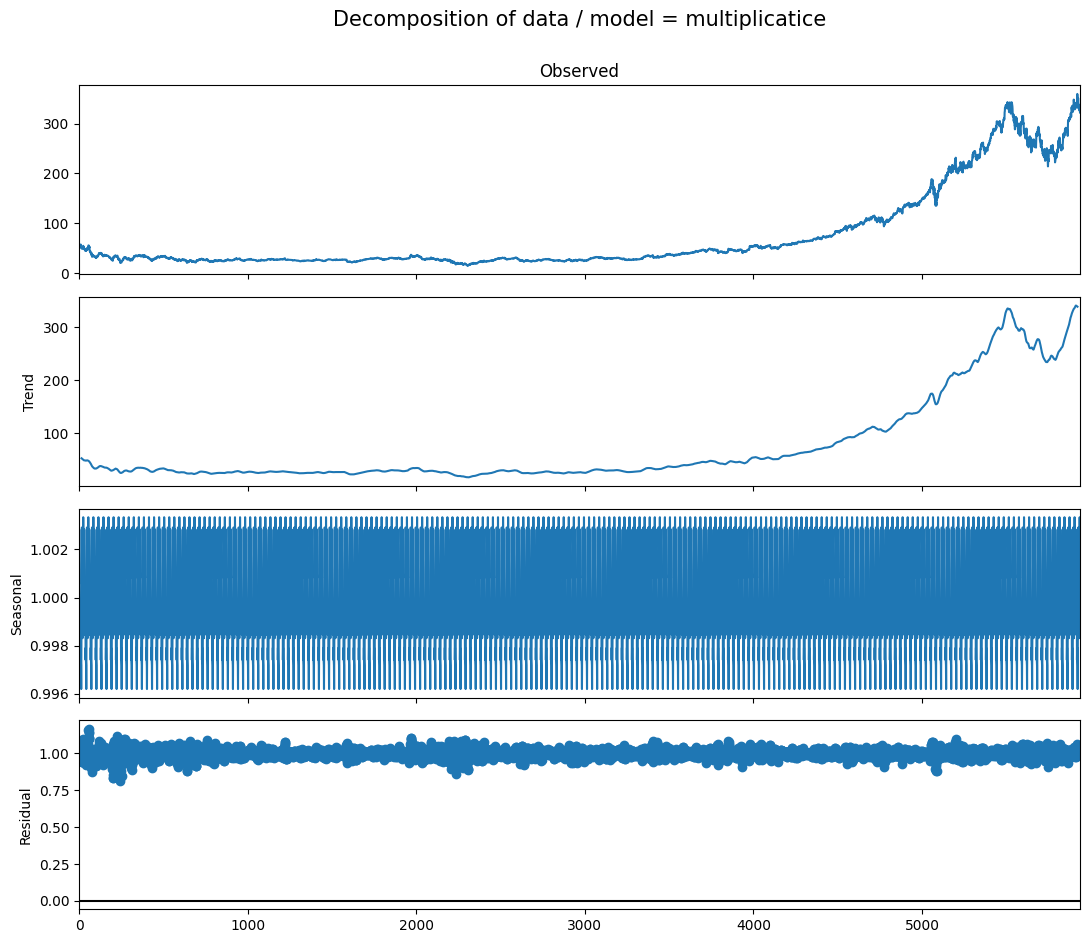

In [34]:
decomposition = seasonal_decompose(ts_log.Close.values,period=30,model="multiplicatice")
rcParams['figure.figsize'] = 11, 9
fig=decomposition.plot()
plt.title('Decomposition of data / model = multiplicatice', fontsize=15, pad=500)
plt.show()

We can clearly observe trend and seasonality

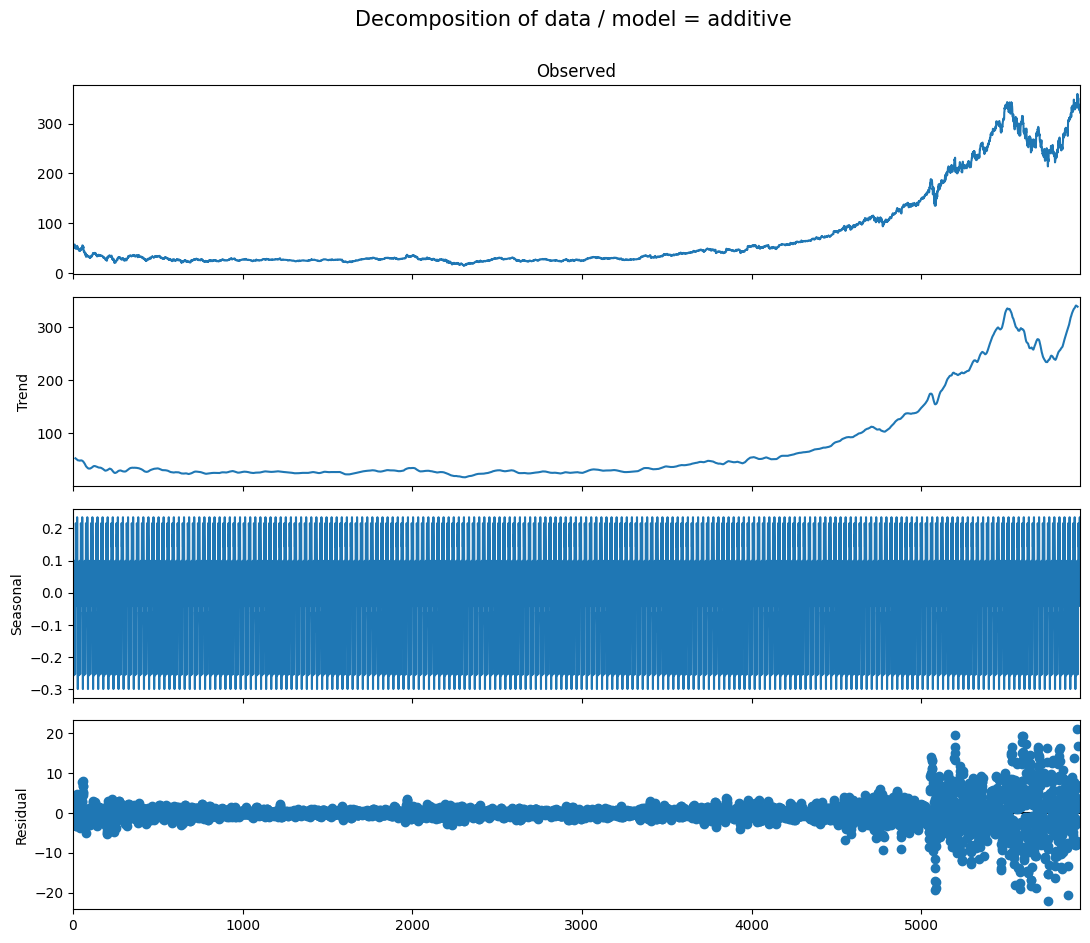

In [35]:
decomposition = seasonal_decompose(ts_log.Close.values,period=30,model="additive")
rcParams['figure.figsize'] = 11, 9
fig=decomposition.plot()
plt.title('Decomposition of data / model = additive ', fontsize=15, pad=500)
plt.show()

# Autocorrelation (ACF) and Partial Autocorrelation (PACF)

**Autocorrelation** refers to the degree of correlation of the same variables between two successive time intervals. It measures how the lagged version of the value of a variable is related to the original version of it in a time series.
(https://corporatefinanceinstitute.com/resources/knowledge/other/autocorrelation/#:~:text=Autocorrelation%20refers%20to%20the%20degree,also%20known%20as%20serial%20correlation.)
A **partial autocorrelation** is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.
(https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)

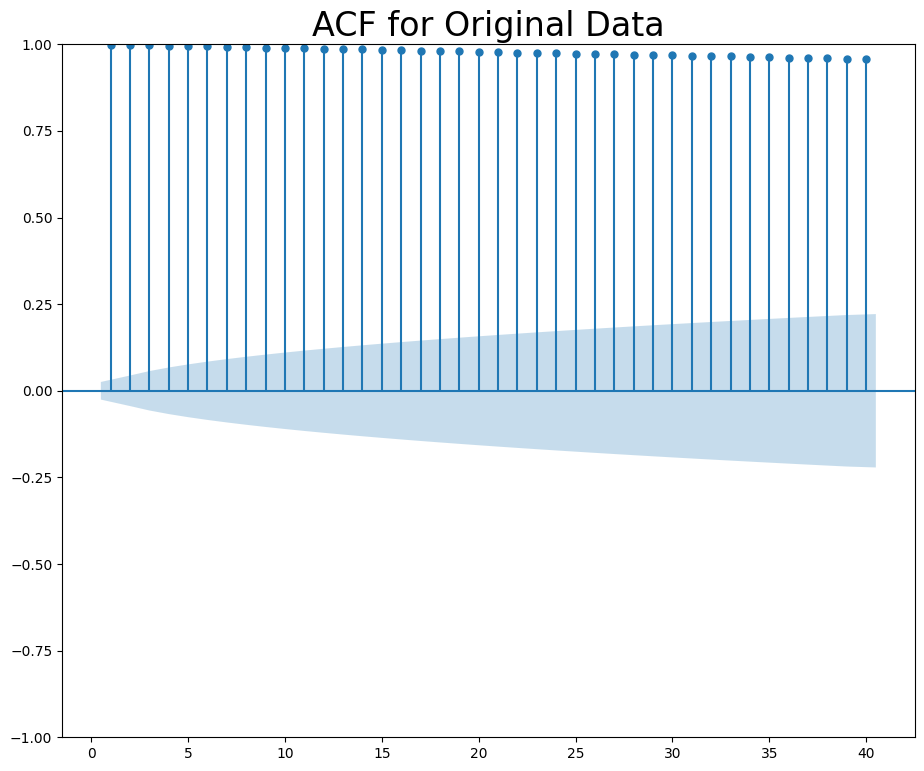

In [36]:
rcParams['figure.figsize'] = 11, 9
sgt.plot_acf(ts_log['Close'], lags = 40, zero = False)
plt.title("ACF for Original Data", size = 24)
plt.show()
#Analysed with the first 40 lags,which means the last 40 periods before the current one

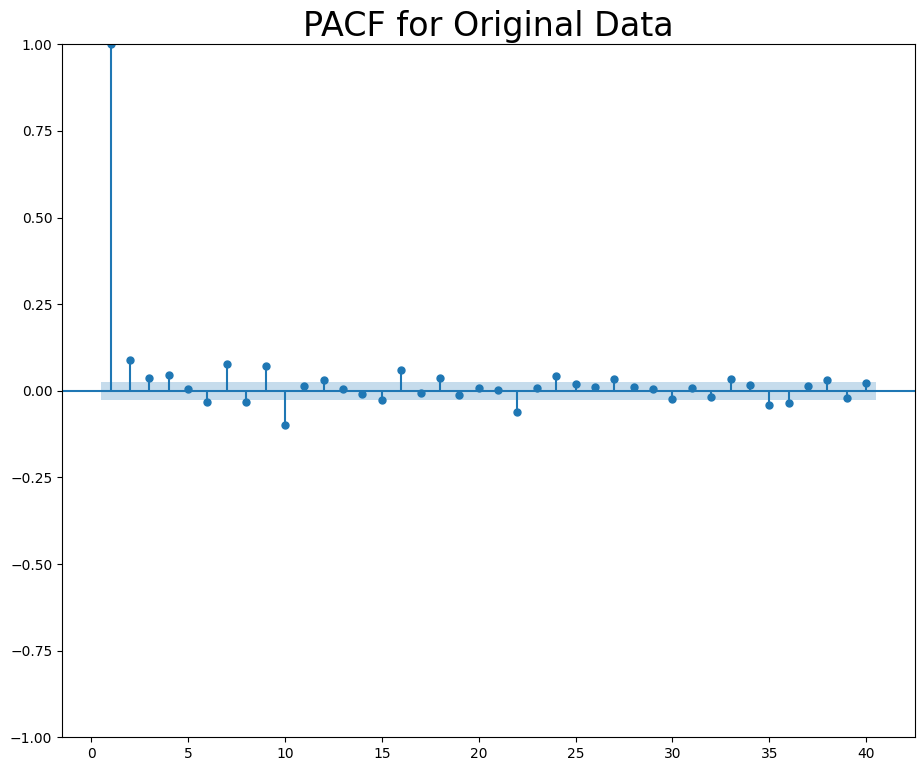

In [37]:
rcParams['figure.figsize'] = 11, 9
sgt.plot_pacf(ts_log['Close'], lags = 40, zero = False, method = ('ols'))
plt.title("PACF for Original Data", size = 24)
plt.show()

Our estimations are all based on stationary distribution. So, we should remove seasonality and trend from data.

# Prediction

<Axes: >

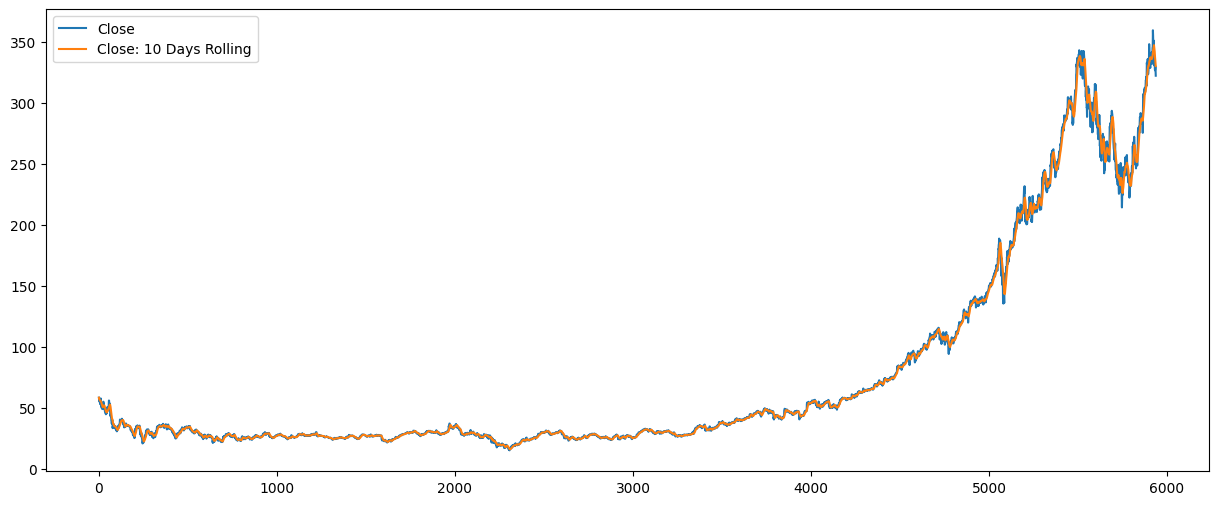

In [38]:
df = data.copy()
df["Close: 10 Days Rolling"] = df["Close"].rolling(window=10,min_periods=1).mean()
df[["Close","Close: 10 Days Rolling"]].plot(figsize=(15,6))

In [39]:
df["Close: 30 Days Rolling"] = df["Close"].rolling(window=30,min_periods=1).mean()
df["Close: 50 Days Rolling"] = df["Close"].rolling(window=50,min_periods=1).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.index, y = df.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))

fig.add_trace(go.Scatter(x = df.index, y = df["Close: 10 Days Rolling"],
                    mode='lines',
                    name='10 days rolling',
                    marker_color = '#1F77B4'))
fig.add_trace(go.Scatter(x = df.index, y = df["Close: 30 Days Rolling"],
                    mode='lines',
                    name='30 days rolling',
                    marker_color = '#D62728'))
fig.add_trace(go.Scatter(x = df.index, y = df["Close: 50 Days Rolling"],
                    mode='lines',
                    name='50 days rolling',
                    marker_color = '#FF7F0E'))
fig.update_layout(
    title='Close Days Rolling',
    titlefont_size = 28,

    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
  title='Close Price USD ($)',
  titlefont_size=16,
  tickfont_size=14),

    height = 800,


    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

* Cumulative Moving Average

In [40]:
df["Cumulative"] = df["Close"].expanding().mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.index, y = df.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))

fig.add_trace(go.Scatter(x = df.index, y = df["Cumulative"],
                    mode='lines',
                    name='Cumulative',
                    marker_color = '#1F77B4'))

fig.update_layout(
    title='Cumulative Moving Average',
    titlefont_size = 28,

    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
  title='Close Price USD ($)',
  titlefont_size=16,
  tickfont_size=14),

    height = 800,


    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

* Exponential Weighted Moving Average

In [41]:
df["EMA_0.1"] = df["Close"].ewm(alpha=0.1,adjust=False).mean()
df["EMA_0.3"] = df["Close"].ewm(alpha=0.3,adjust=False).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.index, y = df.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))

fig.add_trace(go.Scatter(x = df.index, y = df["EMA_0.1"],
                    mode='lines',
                    name='alpha=0.1',
                    marker_color = '#1F77B4'))
fig.add_trace(go.Scatter(x = df.index, y = df["EMA_0.3"],
                    mode='lines',
                    name='alpha=0.3',
                    marker_color = '#D62728'))

fig.update_layout(
    title='Exponential Weighted Moving Average',
    titlefont_size = 28,

    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
  title='Close Price USD ($)',
  titlefont_size=16,
  tickfont_size=14),

    height = 800,


    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

# MAE - MAPE - MSE

In [42]:
df

Date        Open        High         Low       Close    Volume  \
0    2000-01-03   58.687500   59.312500   56.000000   58.281250  53228400   
1    2000-01-04   56.781250   58.562500   56.125000   56.312500  54119000   
2    2000-01-05   55.562500   58.187500   54.687500   56.906250  64059600   
3    2000-01-06   56.093750   56.937500   54.187500   55.000000  54976600   
4    2000-01-07   54.312500   56.125000   53.656250   55.718750  62013600   
...         ...         ...         ...         ...         ...       ...   
5933 2023-08-03  326.000000  329.880005  325.950012  326.660004  18253700   
5934 2023-08-04  331.880005  335.140015  327.239990  327.779999  23727700   
5935 2023-08-07  328.369995  331.109985  327.519989  330.109985  17741500   
5936 2023-08-08  326.959991  328.750000  323.000000  326.049988  22327600   
5937 2023-08-09  326.470001  327.109985  321.049988  322.230011  22373300   

      Close: 10 Days Rolling  Close: 30 Days Rolling  Close: 50 Days Rolling  \
0                  58.281250               58.281250               58.281250   
1                  57.296875               57.296875               57.296875   
2                  57.166667               57.166667               57.166667   
3                  56.625000               56.625000               56.625000   
4                  56.443750               56.443750               56.443750   
...                      ...                     ...                     ...   
5933              337.313998              339.122664              335.994999   
5934              335.714999              338.724998              336.245399   
5935              334.214999              338.561331              336.570599   
5936              331.721997              338.476331              336.573198   
5937              330.167999              338.064997              336.359998   

      Cumulative     EMA_0.1     EMA_0.3  
0      58.281250   58.281250   58.281250  
1      57.296875   58.084375   57.690625  
2      57.166667   57.966563   57.455312  
3      56.625000   57.669906   56.718719  
4      56.443750   57.474791   56.418728  
...          ...         ...         ...  
5933   74.416202  337.713386  332.401971  
5934   74.458891  336.720047  331.015379  
5935   74.501959  336.059041  330.743761  
5936   74.544329  335.058136  329.335629  
5937   74.586041  333.775323  327.203944  

[5938 rows x 12 columns]

In [43]:
y_true=df["Close"]
column=["Close: 10 Days Rolling","Close: 30 Days Rolling","Close: 50 Days Rolling","EMA_0.1","EMA_0.3"]
for i in column:
  y_pred = df[i]
  mape=mean_absolute_percentage_error(y_true,y_pred)
  print("MAPE CLOSE and "+str(i).upper()+" = "+str(mape))
  mae=mean_absolute_error(y_true,y_pred)
  print("MAE CLOSE and "+str(i).upper()+" = "+str(mae))
  mse=mean_squared_error(y_true,y_pred)
  print("MSE CLOSE and "+str(i).upper()+" = "+str(mse))
  print("--------------------------------------")

MAPE CLOSE and CLOSE: 10 DAYS ROLLING = 0.02118800731952991
MAE CLOSE and CLOSE: 10 DAYS ROLLING = 1.5697182473141775
MSE CLOSE and CLOSE: 10 DAYS ROLLING = 9.31599435645475
--------------------------------------
MAPE CLOSE and CLOSE: 30 DAYS ROLLING = 0.038765119839218334
MAE CLOSE and CLOSE: 30 DAYS ROLLING = 2.8222301705506116
MSE CLOSE and CLOSE: 30 DAYS ROLLING = 28.142919319253533
--------------------------------------
MAPE CLOSE and CLOSE: 50 DAYS ROLLING = 0.05033294738665998
MAE CLOSE and CLOSE: 50 DAYS ROLLING = 3.690673574351995
MSE CLOSE and CLOSE: 50 DAYS ROLLING = 45.981717301807414
--------------------------------------
MAPE CLOSE and EMA_0.1 = 0.025983627096931257
MAE CLOSE and EMA_0.1 = 1.917929198077513
MSE CLOSE and EMA_0.1 = 13.177392429115542
--------------------------------------
MAPE CLOSE and EMA_0.3 = 0.012416180685873413
MAE CLOSE and EMA_0.3 = 0.9245436545459091
MSE CLOSE and EMA_0.3 = 3.3541156650137545
--------------------------------------


# Making the Time Series Stationary

* Differencing Method

Calculating the differences between consecutive observations is called "differencing".

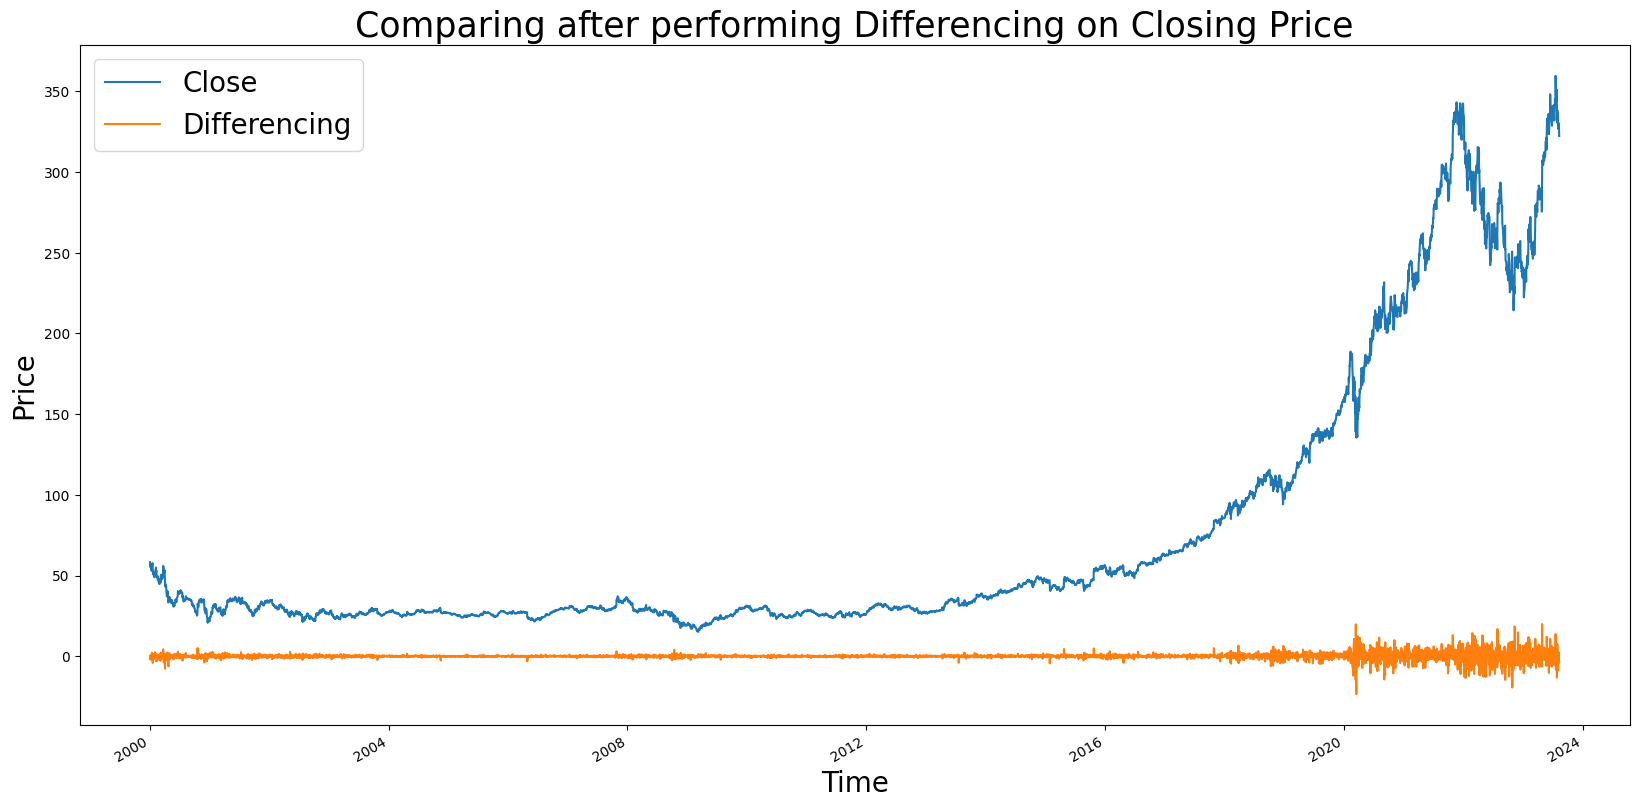

In [44]:
new_df =  pd.DataFrame(ts_log['Close'])
new_df['Differencing'] = list((ts_log['Close']- ts_log['Close'].shift(1).fillna(method='bfill')))
new_df.plot(figsize=(20,10))
plt.title('Comparing after performing Differencing on Closing Price', fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.legend(fontsize = 20, loc=2)
plt.show()

In [45]:
new_df

Close  Differencing
Date                                
2000-01-03   58.281250      0.000000
2000-01-04   56.312500     -1.968750
2000-01-05   56.906250      0.593750
2000-01-06   55.000000     -1.906250
2000-01-07   55.718750      0.718750
...                ...           ...
2023-08-03  326.660004     -0.839996
2023-08-04  327.779999      1.119995
2023-08-07  330.109985      2.329987
2023-08-08  326.049988     -4.059998
2023-08-09  322.230011     -3.819977

[5938 rows x 2 columns]

* Seasonal Differencing

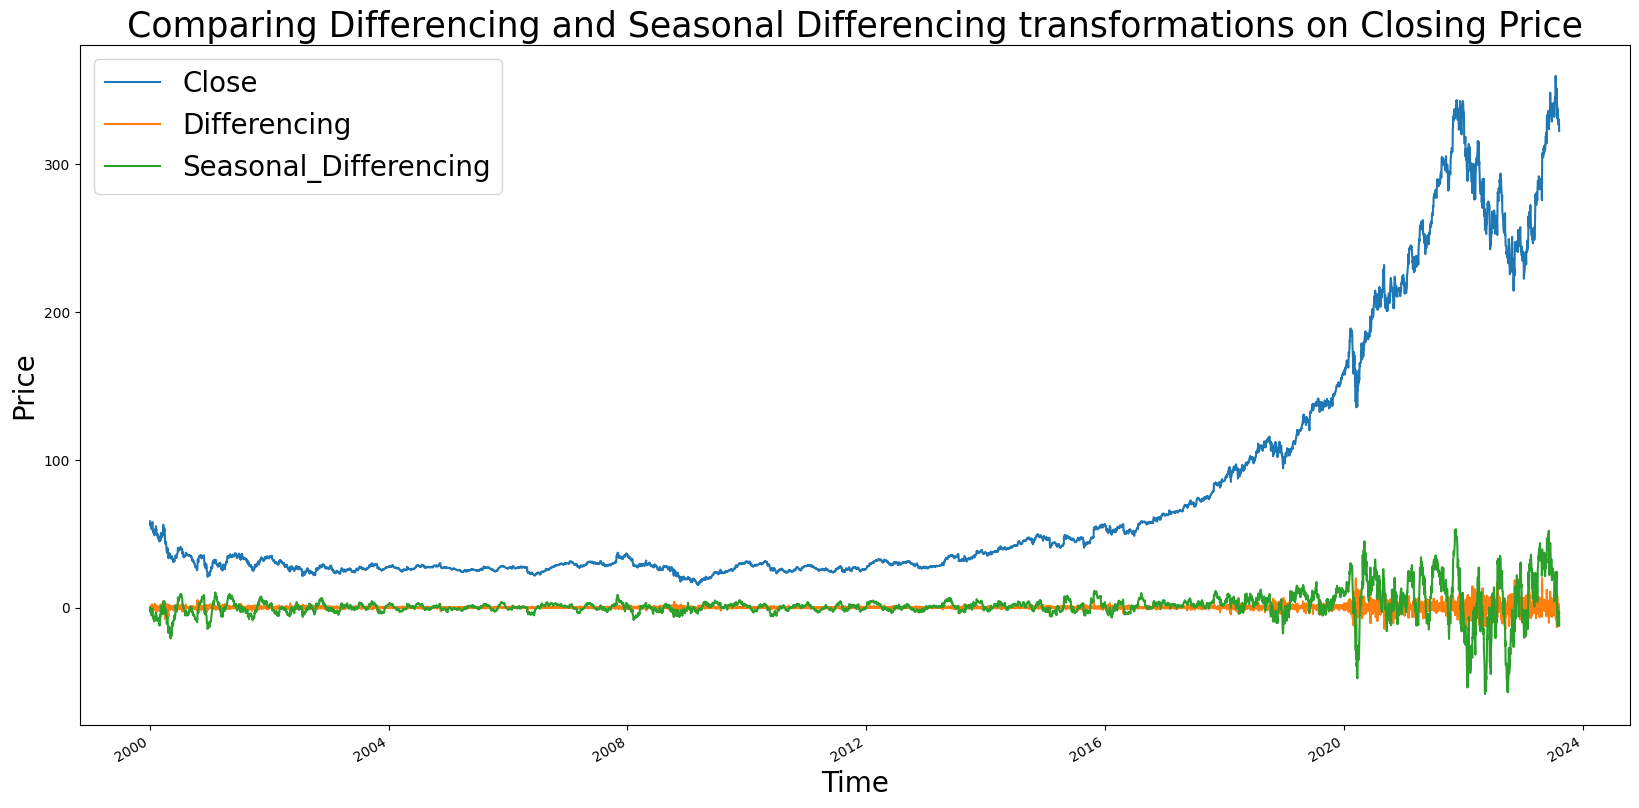

In [46]:
new_df['Seasonal_Differencing'] = list((ts_log['Close'] - ts_log['Close'].shift(30).fillna(method='bfill')))
new_df.plot(figsize=(20,10))
plt.title('Comparing Differencing and Seasonal Differencing transformations on Closing Price', fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.legend(fontsize = 20, loc=2)
plt.show()

* Transformation

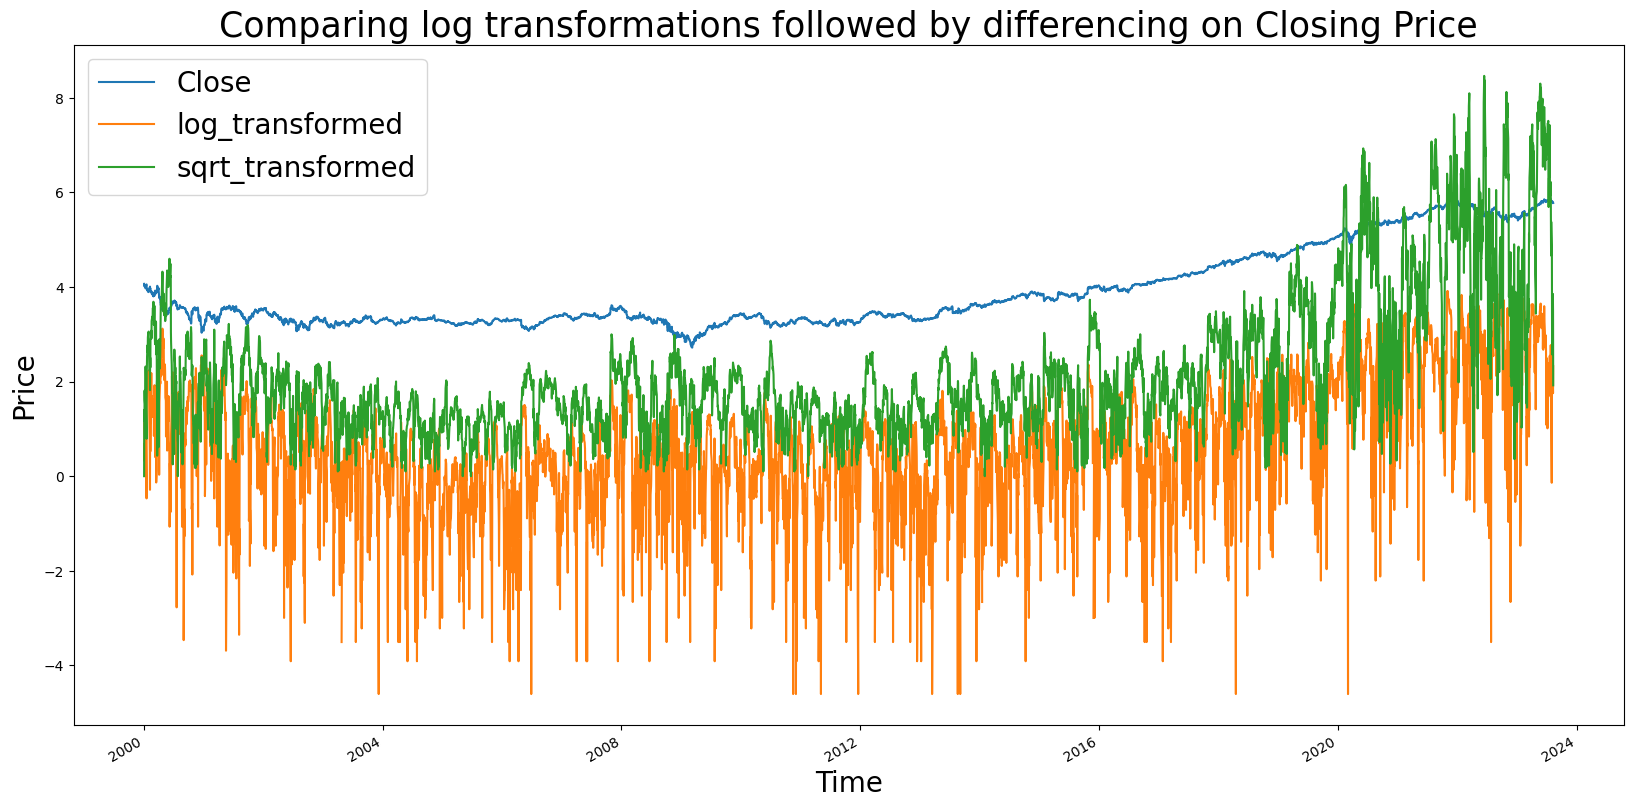

In [47]:
transform_log =  pd.DataFrame(np.log(ts_log['Close']))
transform_log['log_transformed'] = list(np.log(abs(ts_log['Close'] - ts_log['Close'].shift(21).fillna(method='bfill'))))
transform_log['sqrt_transformed'] = list(np.sqrt(abs(ts_log['Close'] - ts_log['Close'].shift(51).fillna(method='bfill'))))
transform_log.plot(figsize=(20,10))

plt.title('Comparing log transformations followed by differencing on Closing Price', fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.legend(fontsize = 20, loc=2)

plt.show()


In [48]:
import numpy as np
transform_log.replace([np.inf,-np.inf],0,inplace=True)
transform_log

Close  log_transformed  sqrt_transformed
Date                                                   
2000-01-03  4.065280         0.000000          0.000000
2000-01-04  4.030917         0.677399          1.403122
2000-01-05  4.041405         0.318454          1.172604
2000-01-06  4.007333         1.188224          1.811422
2000-01-07  4.020317         0.940983          1.600781
...              ...              ...               ...
2023-08-03  5.788920         2.441476          2.884442
2023-08-04  5.792343         2.601948          2.569048
2023-08-07  5.799426         1.961504          3.853567
2023-08-08  5.787051         1.754403          3.492847
2023-08-09  5.775266         2.326301          1.920938

[5938 rows x 3 columns]

In [49]:
compare = []
for i in range(5):
    compare.append([])

compare[0] = (sts.adfuller(new_df['Close']))[:4]
compare[1] = (sts.adfuller(new_df['Differencing']))[:4]
compare[2] = (sts.adfuller(new_df['Seasonal_Differencing']))[:4]
compare[3]=(sts.adfuller(transform_log['log_transformed']))[:4]
compare[4]=(sts.adfuller(transform_log['sqrt_transformed']))[:4]

compare = pd.DataFrame(compare)
compare = compare.rename(columns={0: 'adf_Test_statistics',1: 'p_value',2: 'usedlag',3: 'n_obs'},
                    index={0: 'Close',1: 'Differencing',2: 'Seasonal_Differencing',3:"Log_Transformed",4:"Sqrt_Transformed"})
compare

adf_Test_statistics       p_value  usedlag  n_obs
Close                             2.503523  9.990510e-01       34   5903
Differencing                    -13.015375  2.517473e-24       34   5903
Seasonal_Differencing            -7.769339  9.008347e-12       34   5903
Log_Transformed                  -5.445418  2.717421e-06       34   5903
Sqrt_Transformed                 -6.093629  1.022381e-07       14   5923

In [50]:
sts.adfuller(new_df['Differencing'])

(-13.015375464786652,
 2.517473199945572e-24,
 34,
 5903,
 {'1%': -3.431458274761716,
  '5%': -2.862029754093086,
  '10%': -2.5670306938607035},
 25027.988655507623)

In [51]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(new_df['Differencing'],autolag="AIC")
print("ADF Statistic :%f" % result[0])
print("p value : %f"%result[1])
print("Critical Values: ")
for key,value in result[4].items():
    print("\t%s: %.3f"%(key,value))
    if result[0]<result[4]["5%"]:
        print("Strong evidence against the null hypothesis reject the null hypothesis - Data has no root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root,indicating it is non-stationary.")

ADF Statistic :-13.015375
p value : 0.000000
Critical Values: 
	1%: -3.431
Strong evidence against the null hypothesis reject the null hypothesis - Data has no root and is stationary
	5%: -2.862
Strong evidence against the null hypothesis reject the null hypothesis - Data has no root and is stationary
	10%: -2.567
Strong evidence against the null hypothesis reject the null hypothesis - Data has no root and is stationary


**The differencing method has the minimum value compared to others. For the first difference, the p-value is lower than 0.05. Now the series is stationary. We should consider Autocorrelation and Partial Autocorrelation graphs for the differencing method to find p and q values for ARIMA model.**

# Train Test Split

In [52]:
ts_log = pd.DataFrame(columns=["Date","Close"])
ts_log["Date"] = data["Date"]
ts_log["Close"] = data["Close"]
# Set the column 'Date' as index (skip if already done)
ts_log = ts_log.set_index('Date')
ts_log = ts_log.asfreq('D')

# Specify datetime frequency
ts_log.dropna(inplace=True)

# ts_log.dropna(inplace=True)
ts_log

Close
Date                  
2000-01-03   58.281250
2000-01-04   56.312500
2000-01-05   56.906250
2000-01-06   55.000000
2000-01-07   55.718750
...                ...
2023-08-03  326.660004
2023-08-04  327.779999
2023-08-07  330.109985
2023-08-08  326.049988
2023-08-09  322.230011

[5938 rows x 1 columns]

In [53]:
train_data, test_data = ts_log[0:int(len(ts_log)*0.8)], ts_log[int(len(ts_log)*0.8):]
train_data

Close
Date                  
2000-01-03   58.281250
2000-01-04   56.312500
2000-01-05   56.906250
2000-01-06   55.000000
2000-01-07   55.718750
...                ...
2018-11-09  109.570000
2018-11-12  106.870003
2018-11-13  106.940002
2018-11-14  104.970001
2018-11-15  107.279999

[4750 rows x 1 columns]

In [54]:
test_data

Close
Date                  
2018-11-16  108.290001
2018-11-19  104.620003
2018-11-20  101.709999
2018-11-21  103.110001
2018-11-23  103.070000
...                ...
2023-08-03  326.660004
2023-08-04  327.779999
2023-08-07  330.109985
2023-08-08  326.049988
2023-08-09  322.230011

[1188 rows x 1 columns]

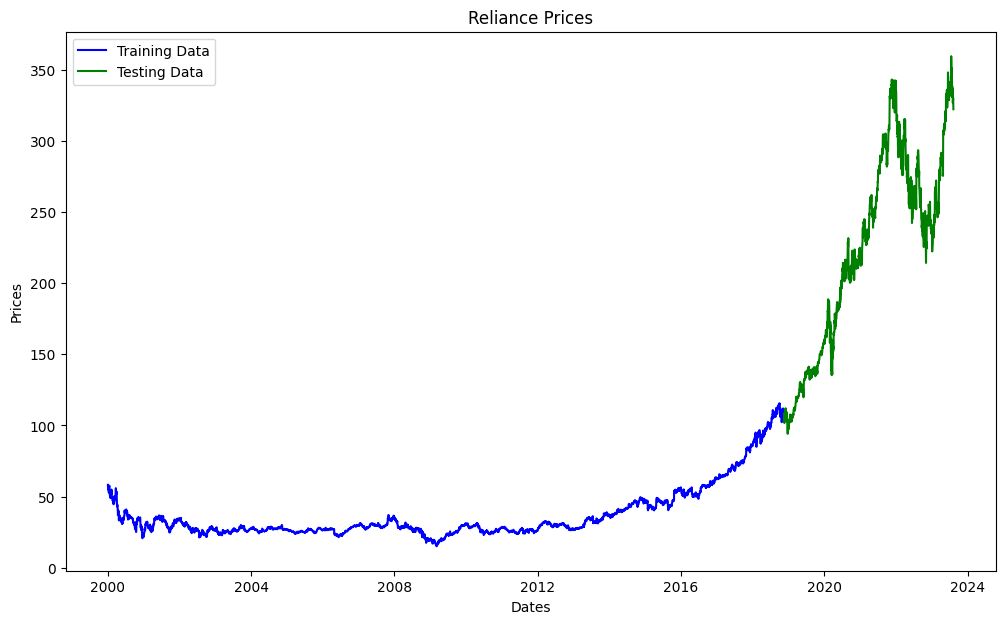

In [55]:
plt.figure(figsize=(12,7))
plt.title('Reliance Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')
plt.legend()

# ARIMA

# What are p,d and q values ? How can we identify them ?

* ARIMA stands for Autoregressive Integrated Moving Average Model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.
* So, ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.ARIMA Models are specified by three order parameters: (p, d, q),
where,

* p is the order of the AR term

* q is the order of the MA term

* d is the number of differencing required to make the time series stationary

* AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
* I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
* MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.
(https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

**The differencing method has the minimum value compared to others. For the first difference, the p-value is lower than 0.05. Now the series is stationary. We should consider Autocorrelation and Partial Autocorrelation graphs for the differencing method to find p and q values for ARIMA model.**

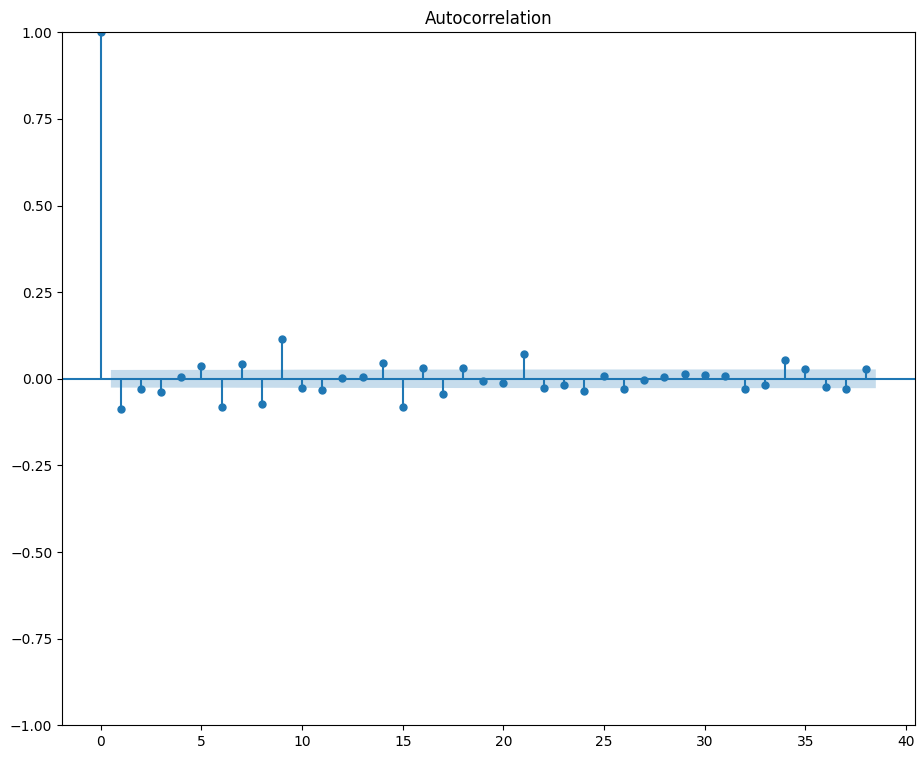

In [56]:
rcParams['figure.figsize'] = 11, 9
acf = plot_acf(new_df['Differencing'].dropna()) #q

In [57]:
a = pd.Series(new_df['Differencing'])
for i in range(5):
    print(a.autocorr(lag=i))

1.0
-0.0879134528209438
-0.028717245863036048
-0.03694824836866295
0.004968860667490111


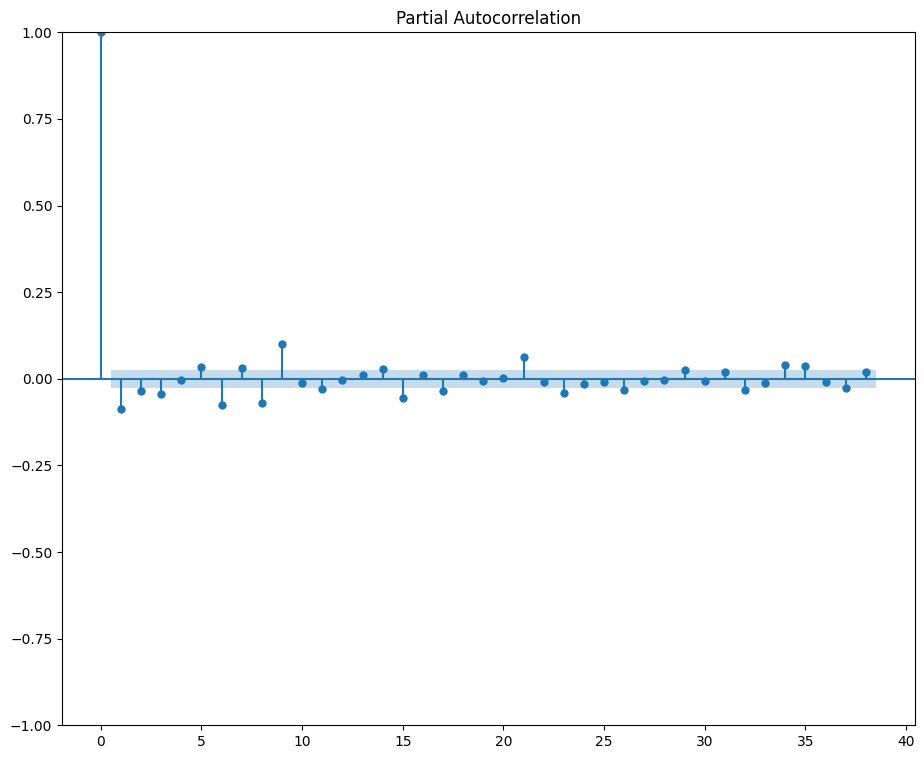

In [58]:
rcParams['figure.figsize'] = 11, 9
pacf = plot_pacf(new_df['Differencing'].dropna()) #p

For our model;

p=1, The ACF lag 1 is well above the blue region.

d = 1, for the first differencing, p-value is lower than 0.05. The time series reaches stationarity with one order of differencing.

q=1, The ACF lag 1 is well above the significance line. Lag 2 turns out to be significant as well, slightly managing to cross the blue region.

In [59]:
train_data

Close
Date                  
2000-01-03   58.281250
2000-01-04   56.312500
2000-01-05   56.906250
2000-01-06   55.000000
2000-01-07   55.718750
...                ...
2018-11-09  109.570000
2018-11-12  106.870003
2018-11-13  106.940002
2018-11-14  104.970001
2018-11-15  107.279999

[4750 rows x 1 columns]

In [60]:
test_data

Close
Date                  
2018-11-16  108.290001
2018-11-19  104.620003
2018-11-20  101.709999
2018-11-21  103.110001
2018-11-23  103.070000
...                ...
2023-08-03  326.660004
2023-08-04  327.779999
2023-08-07  330.109985
2023-08-08  326.049988
2023-08-09  322.230011

[1188 rows x 1 columns]

In [61]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
pred_start = len(train_data)
pred_end = len(train_data)+len(test_data)-1
model = sm.tsa.arima.ARIMA(train_data, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())
pred = model_fit.predict(start= pred_start , end = pred_end, typ='levels', dynamic=True)
pred = pred.tolist()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4750
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5120.122
Date:                Mon, 21 Aug 2023   AIC                          10248.245
Time:                        05:02:03   BIC                          10274.107
Sample:                             0   HQIC                         10257.333
                               - 4750                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3594      0.194     -1.856      0.063      -0.739       0.020
ar.L2         -0.0614      0.014     -4.248      0.000      -0.090      -0.033
ma.L1          0.2806      0.195      1.442      0.1

<Axes: xlabel='Date'>

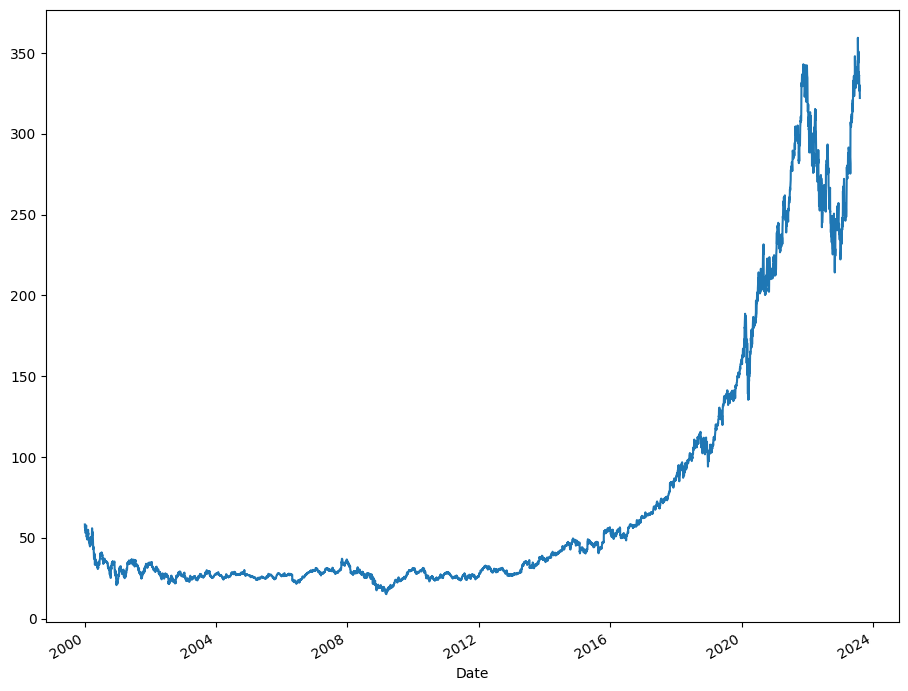

In [62]:
ts_log["Close"].plot()

<Axes: xlabel='Date'>

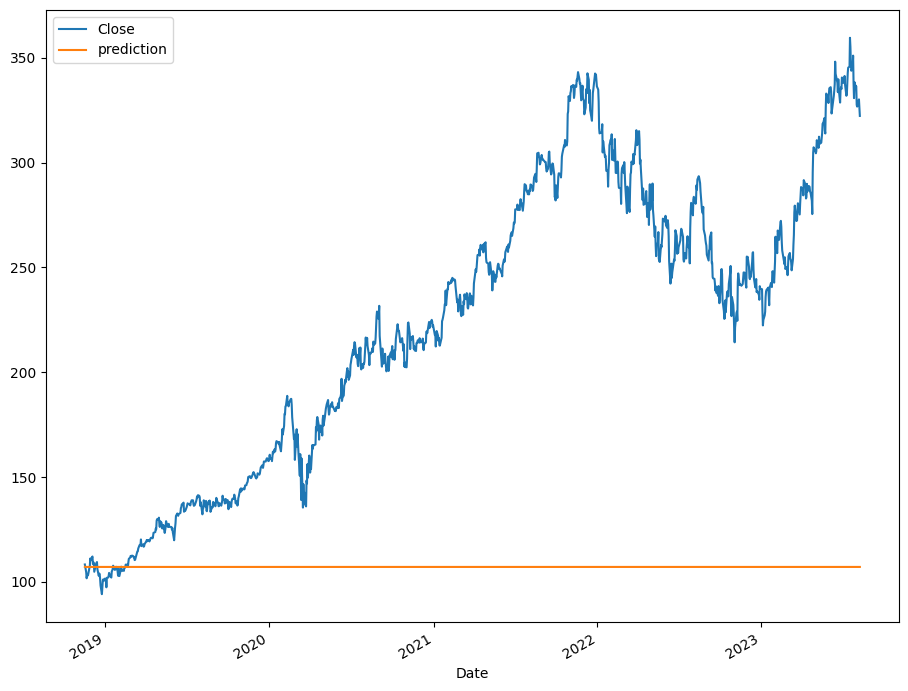

In [63]:
df_arima=pd.DataFrame(test_data)
df_arima["prediction"] = pred
df_arima.plot()

 Each of the predicted forecasts is consistently below the actuals and gives a straight line. I am going to increase the order of differencing to 2.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4750
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -5119.857
Date:                Mon, 21 Aug 2023   AIC                          10247.713
Time:                        05:02:05   BIC                          10273.575
Sample:                             0   HQIC                         10256.801
                               - 4750                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0818      0.007    -10.928      0.000      -0.096      -0.067
ar.L2         -0.0430      0.007     -5.821      0.000      -0.057      -0.029
ma.L1         -0.9984      0.001  -1258.041      0.0

<Axes: xlabel='Date'>

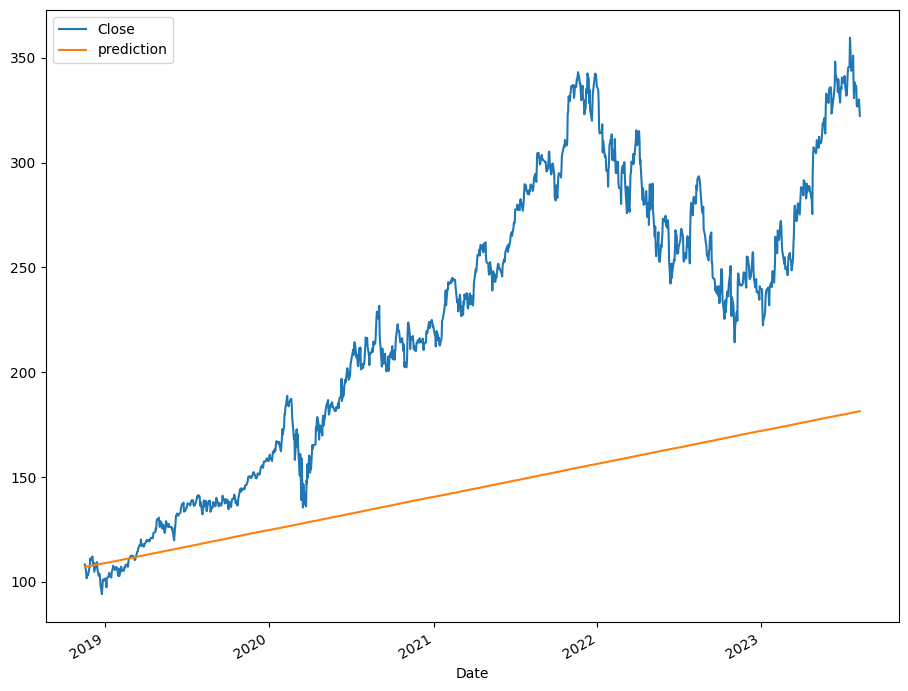

In [64]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
pred_start = len(train_data)
pred_end = len(train_data)+len(test_data)-1
model = sm.tsa.arima.ARIMA(train_data, order=(2,2,1))
model_fit = model.fit()
print(model_fit.summary())
pred2 = model_fit.predict(start= pred_start , end = pred_end, typ='levels', dynamic=True)
pred2 = pred2.tolist()
df_arima2=pd.DataFrame(test_data)
df_arima2["prediction"] = pred2
df_arima2.plot()

ARIMA model uses past data to understand the pattern in the time series. Now the model captured the trend in the series

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5938
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -12678.243
Date:                Mon, 21 Aug 2023   AIC                          25362.486
Time:                        05:02:07   BIC                          25382.552
Sample:                             0   HQIC                         25369.458
                               - 5938                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0906      0.005    -19.615      0.000      -0.100      -0.082
ar.L2         -0.0362      0.005     -7.571      0.000      -0.046      -0.027
sigma2         4.1914      0.024    171.451      0.0

<Axes: xlabel='Date'>

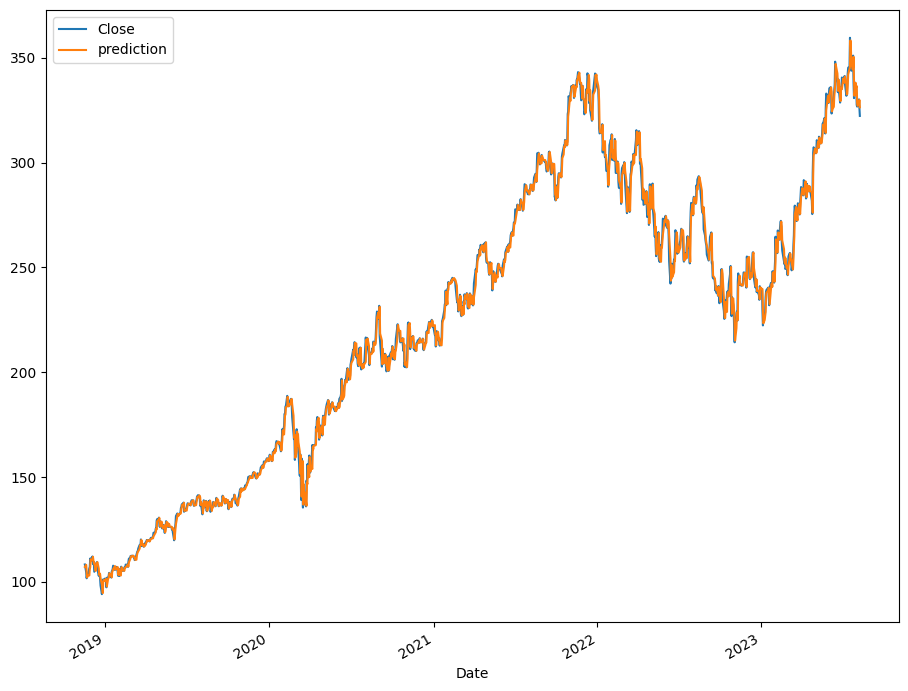

In [65]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
model = sm.tsa.arima.ARIMA(ts_log["Close"], order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())
pred3 = model_fit.predict(start= pred_start , end = pred_end)
df_arima3 = pd.DataFrame(test_data)
df_arima3["prediction"] = pred3
df_arima3.plot()

# Rolling Forecast ARIMA Model

In [66]:
import statsmodels.api as sm

train_data, test_data = ts_log[0:int(len(ts_log)*0.8)], ts_log[int(len(ts_log)*0.8):]
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model =  sm.tsa.arima.ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)

<class 'list'>


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(ts_log['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='red', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data["Close"], color='green', label='Actual Price')
plt.title('Reliance Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

# SARIMAX

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

**Trend Elements**

There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

p: Trend autoregression order.

d: Trend difference order.

q: Trend moving average order.

**Seasonal Elements**

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

P: Seasonal autoregressive order.

D: Seasonal difference order.

Q: Seasonal moving average order.

m: The number of time steps for a single seasonal period.

**SARIMA(p,d,q)(P,D,Q)m**

(https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/)

In [ ]:
!pip install pmdarima


With auto_arima, I'll find the best model for SARIMAX

The problem with plain ARIMA model is it does not support seasonality.

If your time series has defined seasonality, then, go for SARIMA which uses seasonal differencing.

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from previous season.

So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series.
If your model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.

Here’s some practical advice on building SARIMA model:

As a general rule, set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. Try to keep only either SAR or SMA terms if your model has seasonal components.

(https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(ts_log, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

In [67]:
import statsmodels.api as sm
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
model = sm.tsa.statespace.SARIMAX(ts_log,order=(3,0,2),seasonal_order =(2,1,0,12))
model_fit = model.fit()
pred = model_fit.predict(start= pred_start , end = pred_end)
pred

KeyboardInterrupt: ignored

In [ ]:
df_sarimax = pd.DataFrame(test_data)
df_sarimax["prediction"] = pd.Series(pred,index=test_data.index)
df_sarimax.plot()

In [ ]:
model2 = sm.tsa.statespace.SARIMAX(ts_log,order=(3,1,2),seasonal_order =(2,1,0,12))
model_fit2= model2.fit()
pred2 = model_fit2.predict(start= pred_start , end = pred_end)
pred2

In [ ]:
df_sarimax2 = pd.DataFrame(test_data)
df_sarimax2["prediction"] = pd.Series(pred2,index=test_data.index)
df_sarimax2.plot()

# LSTM

In [68]:
data

Date        Open        High         Low       Close    Volume
0    2000-01-03   58.687500   59.312500   56.000000   58.281250  53228400
1    2000-01-04   56.781250   58.562500   56.125000   56.312500  54119000
2    2000-01-05   55.562500   58.187500   54.687500   56.906250  64059600
3    2000-01-06   56.093750   56.937500   54.187500   55.000000  54976600
4    2000-01-07   54.312500   56.125000   53.656250   55.718750  62013600
...         ...         ...         ...         ...         ...       ...
5933 2023-08-03  326.000000  329.880005  325.950012  326.660004  18253700
5934 2023-08-04  331.880005  335.140015  327.239990  327.779999  23727700
5935 2023-08-07  328.369995  331.109985  327.519989  330.109985  17741500
5936 2023-08-08  326.959991  328.750000  323.000000  326.049988  22327600
5937 2023-08-09  326.470001  327.109985  321.049988  322.230011  22373300

[5938 rows x 6 columns]

In [ ]:
data_copy=data.copy()
data_copy = data_copy.drop(columns=["Date"])
data_training,data_test = data_copy[0:int(len(data_copy)*0.8)],data_copy[int(len(data_copy)*0.8):]
data_training

In [71]:
data_test

Open        High         Low       Close    Volume
4750  107.080002  108.879997  106.800003  108.290001  33502100
4751  108.269997  108.559998  103.550003  104.620003  44773900
4752  101.800003  102.970001   99.349998  101.709999  64052500
4753  103.599998  104.430000  102.239998  103.110001  28130600
4754  102.169998  103.809998  102.000000  103.070000  13823100
...          ...         ...         ...         ...       ...
5933  326.000000  329.880005  325.950012  326.660004  18253700
5934  331.880005  335.140015  327.239990  327.779999  23727700
5935  328.369995  331.109985  327.519989  330.109985  17741500
5936  326.959991  328.750000  323.000000  326.049988  22327600
5937  326.470001  327.109985  321.049988  322.230011  22373300

[1188 rows x 5 columns]

In [72]:
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(data_training)
train_data_scaled

array([[0.43392038, 0.43449184, 0.41105337, 0.42933755, 0.07847963],
       [0.41489973, 0.42703361, 0.41230262, 0.40974019, 0.08000561],
       [0.40273898, 0.42330449, 0.39793624, 0.41565051, 0.09703807],
       ...,
       [0.92147281, 0.9260143 , 0.9171497 , 0.91369701, 0.0478885 ],
       [0.92696069, 0.92124107, 0.89546273, 0.89408721, 0.05494866],
       [0.89592895, 0.91666669, 0.88986611, 0.91708141, 0.05325254]])

In [73]:
#I will read the first 30 days of data and put it into the X_train.
# First 30 days we need to make it as training set and then move one day ahead and then put another 30 days into the X_train
# With the value of 30 we have given, the model will work in such a way that it examines 30 data and predicts the next one,
# then examines 30 data again and tries to predict the next one.
X_train=[]
y_train=[]
for i in range(30,train_data_scaled.shape[0]):
    X_train.append(train_data_scaled[i-30:i])
    y_train.append(train_data_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

We have to give the input_shape value to our first LSTM layer, because our model does not know the size of the data it will process, we do not need to enter this value in the next steps.

In [74]:
regressior = Sequential()
regressior.add(LSTM(units=30,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],5)))
regressior.add(Dropout(0.2))
regressior.add(LSTM(units=60,activation='relu',return_sequences=True))
regressior.add(Dropout(0.2))
regressior.add(LSTM(units=80,activation='relu',return_sequences=True))
regressior.add(Dropout(0.2))
regressior.add(LSTM(units=100,activation='relu',return_sequences=True))
regressior.add(Dropout(0.3))
regressior.add(LSTM(units=120,activation='relu'))
regressior.add(Dropout(0.3))
regressior.add(Dense(units=1))
regressior.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            4320      
                                                                 
 dropout (Dropout)           (None, 30, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 60)            21840     
                                                                 
 dropout_1 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 30, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 100)           7

In [75]:
regressior.compile(optimizer='adam',loss='mean_squared_error')
regressior.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
148/148 [==============================] - 54s 277ms/step - loss: 0.0091
Epoch 2/10
148/148 [==============================] - 44s 298ms/step - loss: 0.0020
Epoch 3/10
148/148 [==============================] - 42s 285ms/step - loss: 0.0015
Epoch 4/10
148/148 [==============================] - 44s 294ms/step - loss: 0.0014
Epoch 5/10
148/148 [==============================] - 43s 290ms/step - loss: 0.0014
Epoch 6/10
148/148 [==============================] - 43s 291ms/step - loss: 0.0011
Epoch 7/10
148/148 [==============================] - 42s 283ms/step - loss: 0.0011
Epoch 8/10
148/148 [==============================] - 41s 279ms/step - loss: 9.7207e-04
Epoch 9/10
148/148 [==============================] - 43s 292ms/step - loss: 0.0011
Epoch 10/10
148/148 [==============================] - 41s 276ms/step - loss: 0.0010


In [76]:
past_30_days = data_training.tail(30)
df = past_30_days.append(data_test,ignore_index=True)
df

Open        High         Low       Close    Volume
0     112.629997  113.169998  110.639999  112.129997  29068900
1     111.660004  112.029999  109.339996  110.849998  29640600
2     111.139999  113.080002  110.800003  112.260002  26198600
3     111.239998  111.500000  105.790001  106.160004  61376300
4     105.349998  108.930000  104.199997  105.910004  63904300
...          ...         ...         ...         ...       ...
1213  326.000000  329.880005  325.950012  326.660004  18253700
1214  331.880005  335.140015  327.239990  327.779999  23727700
1215  328.369995  331.109985  327.519989  330.109985  17741500
1216  326.959991  328.750000  323.000000  326.049988  22327600
1217  326.470001  327.109985  321.049988  322.230011  22373300

[1218 rows x 5 columns]

In [77]:
input = scaler.fit_transform(df)
input

array([[0.06560143, 0.0565455 , 0.06453111, 0.06783238, 0.19637291],
       [0.06196318, 0.05230459, 0.05950169, 0.06300875, 0.20196395],
       [0.06001275, 0.05621071, 0.06515012, 0.0683223 , 0.16830232],
       ...,
       [0.87479838, 0.86730399, 0.90359017, 0.88928246, 0.08559464],
       [0.86950974, 0.85852461, 0.88610337, 0.8739825 , 0.1304452 ],
       [0.86767189, 0.85242359, 0.87855921, 0.85958705, 0.13089213]])

In [78]:
X_test=[]
y_test=[]
for i in range(30,input.shape[0]):
    X_test.append(input[i-30:i])
    y_test.append(input[i,0])
X_test,y_test = np.array(X_test),np.array(y_test)
y_pred = regressior.predict(X_test)
y_pred

38/38 [==============================] - 2s 24ms/step


array([[0.03353433],
       [0.03394765],
       [0.0341827 ],
       ...,
       [0.7508155 ],
       [0.7491084 ],
       [0.7475651 ]], dtype=float32)

# Bring scaled values into normal values

In [79]:
scaler.scale_ #scaling levels
# 9.12658574e-03 for Close column

array([3.75079704e-03, 3.72009973e-03, 3.86877123e-03, 3.76846558e-03,
       9.77967373e-09])

In [80]:
scale = 1/9.12658574e-03
scale

109.57000005130067

In [81]:
y_pred = y_pred*scale
y_test= y_test*scale
y_pred

array([[ 3.674357 ],
       [ 3.7196445],
       [ 3.745399 ],
       ...,
       [82.26685  ],
       [82.0798   ],
       [81.910706 ]], dtype=float32)

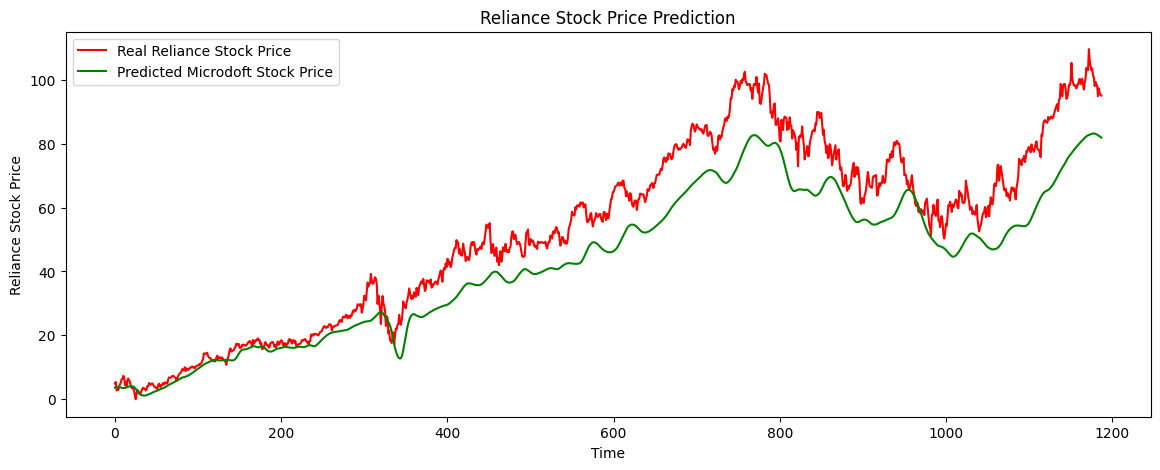

In [82]:
plt.figure(figsize=(14,5))
plt.plot(y_test,color="red",label="Real Reliance Stock Price")
plt.plot(y_pred,color="green",label="Predicted Microdoft Stock Price")
plt.title("Reliance Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Reliance Stock Price")
plt.legend()
plt.show()